In [1]:
#Importing the Milestone 2 dataframe
from ipynb.fs.full.FinalProjectBKudaimiPart1 import *


In [2]:
#Importing the Milestone 3 dataframe
from ipynb.fs.full.FinalProjectBKudaimiPart2 import *


In [3]:
#Importing the Milestone 4 dataframe
from ipynb.fs.full.FinalProjectBKudaimiPart3 import *


In [4]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns

In [5]:
#Before merging all three datasets, a few last minute cleanups will be done

#Removing hyphens from Mercedes cars (except G class) to make matching easier
for i in list(car_sales[car_sales['Make'] == 'MERCEDES-BENZ'].index):
    car_sales['Model'][i] = car_sales['Model'][i].replace('-', ' ')
    car_sales['Model'][i] = car_sales['Model'][i].replace('G CLASS', 'G-CLASS')

In [6]:
#Mercedes-Benz and BMW have models with trim names directly appended to the model name (e.g., 3-series is called 3XXX).
#For easier data frame joining, the trim names will be removed from the model name

#First, words such as 'class' and 'series' will be removed to leave the model name.
#Then the full name will be replaced with just the model name
for i in list(car_sales[car_sales['Make'] == 'MERCEDES-BENZ'].index):
    car_sales['Model'][i] = car_sales['Model'][i].replace('-CLASS', ' ')
    car_sales['Model'][i] = car_sales['Model'][i].replace('CLASS', ' ')
    car_sales['Model'][i] = car_sales['Model'][i].strip()
    
for j in list(car_sales[car_sales['Make'] == 'BMW'].index):
    car_sales['Model'][j] = car_sales['Model'][j].replace('-SERIES', ' ')
    car_sales['Model'][j] = car_sales['Model'][j].strip()

for k in list(cars[cars['Make'] == 'BMW'].index):
    if cars['Model'][k][0].isdigit() == True:
        cars['Model'][k] = cars['Model'][k].replace(cars['Model'][k], cars['Model'][k][0])

In [7]:
#A typo was made with the Hyundai Tucson, so it is fixed here
car_sales['Model'] = car_sales['Model'].str.replace('TUSCON', 'TUCSON')


In [8]:
#Now we are ready to load each data frame into SQLite.

#First, connecting to the database
conn = sql.connect('car_test_database.db')

In [9]:
#Inserting the flat file data frame into SQLite
cars.to_sql('Cars', conn)

In [10]:
#Inserting the website data frame into SQLite
car_sales.to_sql('Car Sales', conn)

In [11]:
#Inserting the API data frame into SQLite
car_dims.to_sql('Car Dimensions', conn)

In [12]:
#Using queries to ensure the tables were added to SQLite correctly

#Calling up the flat file data frame with a query
Query1 = pd.read_sql('SELECT * FROM Cars', conn)
Query1

,index,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,ACURA,ILX,2.311111,4.000000,9.944444,6.966667,8.600000,32.777778,199.222222
1,1,ACURA,MDX,3.500000,6.000000,12.404167,9.175000,10.945833,25.666667,254.875000
2,2,ACURA,NSX,3.500000,6.000000,11.100000,10.800000,11.000000,26.000000,261.000000
3,3,ACURA,RDX,2.535714,4.714286,11.607143,8.878571,10.371429,27.071429,242.250000
4,4,ACURA,RLX,3.500000,6.000000,11.900000,7.700000,10.000000,28.000000,231.666667
...,...,...,...,...,...,...,...,...,...,...
404,404,VOLVO,V90,2.000000,4.000000,10.600000,7.550000,9.233333,30.500000,215.500000
405,405,VOLVO,XC40,2.000000,4.000000,10.350000,7.550000,9.100000,30.750000,212.500000
406,406,VOLVO,XC60,2.537037,4.962963,12.070370,8.818519,10.607407,27.000000,245.111111
407,407,VOLVO,XC70,2.760000,5.400000,12.480000,9.070000,10.940000,26.200000,252.200000


In [13]:
#Calling up the website data frame with a query
Query2 = pd.read_sql('SELECT * FROM [Car Sales]', conn)
Query2

,index,Make/Model,Make,Model,Annual Sales
0,0,FIAT 124 SPIDER,FIAT,124 SPIDER,"2,646"
1,1,BMW 2-SERIES,BMW,2,"8,015"
2,2,CHRYSLER 200,CHRYSLER,200,48
3,3,MAZDA 3,MAZDA,3,"50,741"
4,4,BMW 3-SERIES,BMW,3,"47,827"
...,...,...,...,...,...
277,280,CADILLAC XT6,CADILLAC,XT6,"11,560"
278,281,CADILLAC XTS,CADILLAC,XTS,"11,306"
279,282,TOYOTA YARIS,TOYOTA,YARIS,"21,916"
280,283,GMC YUKON,GMC,YUKON,"74,672"


In [14]:
#Calling up the API data frame with a query
Query3 = pd.read_sql('SELECT * FROM [Car Dimensions]', conn)
Query3

,index,Make,Model,Length (cm),Width (cm),Height (cm),Wheelbase (cm),Curb Weight (kg),Front Track Width (cm),Rear Track Width (cm),Weight Distribution (Front/Rear)
0,0,ACURA,ILX,462,180,141,267,1415,151,152,60/40
1,1,ACURA,MDX,498,196,171,282,1970,169,168,58/42
2,2,ACURA,NSX,447,194,122,263,1725,166,162,42/58
3,3,ACURA,RDX,474,190,167,275,1830,163,164,57/43
4,4,ACURA,TLX,484,185,145,278,1596,160,160,60/40
...,...,...,...,...,...,...,...,...,...,...,...
262,300,VOLVO,S90,496,189,144,294,1840,163,163,56/44
263,301,VOLVO,V60,476,185,150,287,1723,160,160,56/44
264,302,VOLVO,V90,494,189,144,294,1826,163,163,54/46
265,304,VOLVO,XC60,469,190,166,287,1866,166,166,55/45


In [16]:
#Merging all three data frames together in SQL based on the cars' make and model


cars_merged = pd.read_sql('SELECT * FROM Cars JOIN [Car Sales] ON [Car Sales].Make = [Cars].Make AND [Car Sales].Model = [Cars].Model JOIN [Car Dimensions] ON [Cars].Make = [Car Dimensions].Make AND [Cars].Model = [Car Dimensions].Model', conn)
cars_merged


,index,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),...,Make,Model,Length (cm),Width (cm),Height (cm),Wheelbase (cm),Curb Weight (kg),Front Track Width (cm),Rear Track Width (cm),Weight Distribution (Front/Rear)
0,0,ACURA,ILX,2.311111,4.000000,9.944444,6.966667,8.600000,32.777778,199.222222,...,ACURA,ILX,462,180,141,267,1415,151,152,60/40
1,1,ACURA,MDX,3.500000,6.000000,12.404167,9.175000,10.945833,25.666667,254.875000,...,ACURA,MDX,498,196,171,282,1970,169,168,58/42
2,2,ACURA,NSX,3.500000,6.000000,11.100000,10.800000,11.000000,26.000000,261.000000,...,ACURA,NSX,447,194,122,263,1725,166,162,42/58
3,3,ACURA,RDX,2.535714,4.714286,11.607143,8.878571,10.371429,27.071429,242.250000,...,ACURA,RDX,474,190,167,275,1830,163,164,57/43
4,6,ACURA,TLX,3.096667,5.266667,11.100000,7.643333,9.556667,29.566667,223.233333,...,ACURA,TLX,484,185,145,278,1596,160,160,60/40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,395,VOLKSWAGEN,JETTA,1.910145,4.000000,8.983152,6.506522,7.884964,36.213768,191.561594,...,VOLKSWAGEN,JETTA,472,181,146,269,1350,154,154,59/41
268,396,VOLKSWAGEN,PASSAT,2.223529,4.352941,9.191176,6.485294,7.996078,36.254902,197.254902,...,VOLKSWAGEN,PASSAT,487,184,147,280,1480,156,153,60/40
269,398,VOLKSWAGEN,TIGUAN,2.000000,4.000000,11.678571,9.045000,10.500714,26.900000,244.571429,...,VOLKSWAGEN,TIGUAN,472,183,169,279,1749,159,157,56/44
270,406,VOLVO,XC60,2.537037,4.962963,12.070370,8.818519,10.607407,27.000000,245.111111,...,VOLVO,XC60,469,190,166,287,1866,166,166,55/45


In [17]:
#Since there are now multiple columns with the same name, the merged data frame will be transposed to use the 
#drop_duplicates() function to remove the duplicate columns. The new data frame will then be transposed again 
#to return it to normal, albeit without the extra columns.

cars_merged = cars_merged.T.drop_duplicates().T

In [18]:
#Deleting the extra index column
del cars_merged['index']

#Inserting the merged data frame into SQLite
cars_merged.to_sql('Full Car Specifications', conn)

In [19]:
#Calling up the merged data frame with a query to ensure it was inserted. 
#I ordered it by wheelbase for the upcoming visualizations.
Query4 = pd.read_sql('SELECT * FROM [Full Car Specifications] ORDER BY [Wheelbase (cm)]', conn)
Query4

,index,Make,Model,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make/Model,Annual Sales,Length (cm),Width (cm),Height (cm),Wheelbase (cm),Curb Weight (kg),Front Track Width (cm),Rear Track Width (cm),Weight Distribution (Front/Rear)
0,132,FIAT,500,1.400000,4.000000,8.751429,6.964196,7.968795,35.492857,184.711607,FIAT 500,"3,267",355,163,152,230,1068,142,140,62/38
1,218,MAZDA,MX-5,2.000000,4.000000,9.514545,7.328182,8.515455,33.509091,198.318182,MAZDA MX-5 MIATA,"7,753",391,173,124,231,1065,151,152,53/47
2,6,ALFA ROMEO,4C,1.800000,4.000000,9.700000,6.900000,8.400000,34.000000,196.333333,ALFA ROMEO 4C,145,399,187,118,238,1118,164,160,41/59
3,120,CHEVROLET,SPARK,1.342857,4.000000,7.807143,6.071429,7.021429,40.285714,164.000000,CHEVROLET SPARK,"31,280",364,160,148,239,1019,138,138,64/36
4,225,MERCEDES-BENZ,SLC,2.000000,4.000000,9.775000,7.300000,8.675000,32.500000,203.000000,MERCEDES-BENZ SLC-CLASS,"1,916",413,181,130,243,1505,156,157,50/50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,239,NISSAN,TITAN,5.600000,8.000000,16.222778,11.952222,14.303889,19.794444,334.000000,NISSAN TITAN,"31,514",575,205,196,355,2638,179,179,58/42
268,113,CHEVROLET,COLORADO,3.014884,4.750446,13.023886,10.040508,11.687077,24.356061,286.506684,CHEVROLET COLORADO,"121,703",571,189,179,357,1932,158,158,57/43
269,151,GMC,CANYON,2.922326,4.625668,12.560829,9.148262,11.030615,25.659091,266.885027,GMC CANYON,"32,826",571,189,179,357,1932,158,158,57/43
270,152,GMC,SIERRA,4.700476,6.969649,15.030167,11.410565,13.402133,21.512199,300.457401,GMC SIERRA,"232,325",573,203,188,365,2206,175,172,58/42


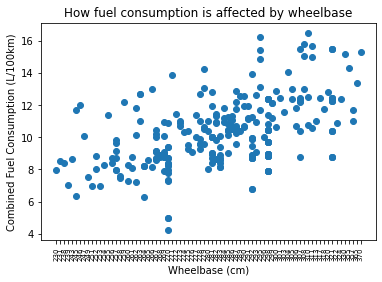

In [20]:
#Generating visualizations

#Scatter plot of combined fuel economy (flat file) vs wheelbase (API)

plt.scatter(Query4['Wheelbase (cm)'], Query4['Fuel Consumption Comb (L/100 km)'])
plt.xlabel('Wheelbase (cm)')
plt.ylabel('Combined Fuel Consumption (L/100km)')
plt.title('How fuel consumption is affected by wheelbase')
plt.xticks(fontsize = 7, rotation = 90)
plt.show()

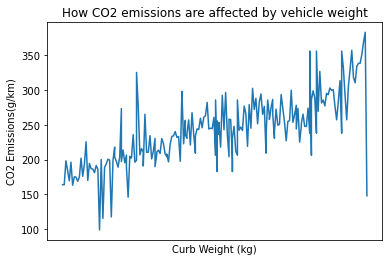

In [21]:
Query5 = pd.read_sql('SELECT * FROM [Full Car Specifications] ORDER BY [Curb Weight (kg)]', conn)

#Line chart of CO2 emissions (flat file) vs vehicle curb weight (API). The end point appears to be an outlier.
#The x ticks were removed since they could not all fit on the axis, even with the smallest font size.
plt.plot(Query5['Curb Weight (kg)'], Query5['CO2 Emissions(g/km)'])
plt.xlabel('Curb Weight (kg)')
plt.ylabel('CO2 Emissions(g/km)')
plt.title('How CO2 emissions are affected by vehicle weight')
plt.xticks([], [])
plt.show()

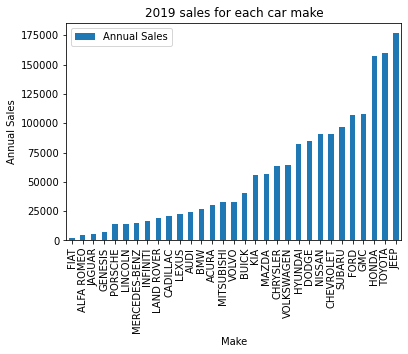

In [22]:
#Bar chart of average car sales (website) for each car make (flat file)

#Grabbing a query of the car data ordered by wheelbase, then deleting the columns I don't need from the query
Query6 = pd.read_sql('SELECT * FROM [Full Car Specifications] ORDER BY [Annual Sales]', conn)
del Query6['index']
del Query6['Weight Distribution (Front/Rear)']

#Generating the bar chart and ordering the wheelbases
Query6['Annual Sales'] = Query6['Annual Sales'].str.replace(',', '').astype(float)

ordered = Query6.groupby(['Make']).mean().sort_values(by = ['Annual Sales'])
ordered.plot.bar(y = 'Annual Sales')
plt.ylabel('Annual Sales')
plt.title('2019 sales for each car make')
plt.show()

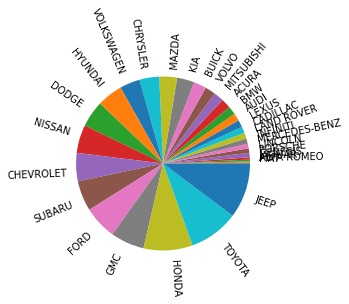

In [23]:
#Viewing the annual sales (website) for each make (flat file) as a pie chart

grouped = Query6.groupby('Make').mean().sort_values(by = 'Annual Sales')
plt.pie(grouped['Annual Sales'].sort_values(), labels = grouped['Annual Sales'].sort_values().index, rotatelabels = True)
plt.show()


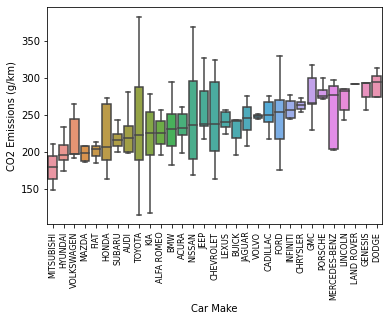

In [24]:
#Boxplots of the CO2 emissions distribution (flat file) for each car make (flat file)

order1 = Query6.groupby("Make").median().sort_values(by = ["CO2 Emissions(g/km)"], ascending = True).index

p5 = sns.boxplot(x = 'Make', y = 'CO2 Emissions(g/km)', data = Query6, order = order1, showfliers = False)
p5.set(xlabel = "Car Make", ylabel = "CO2 Emissions (g/km)")
p5.set_xticklabels(p5.get_xticklabels(), rotation = 90, fontsize = 8)
plt.show()


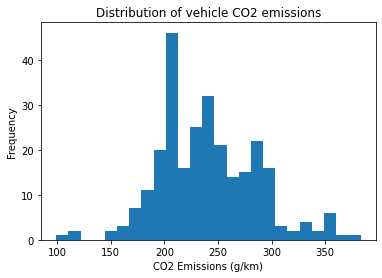

In [25]:
#Histogram of CO2 emissions (flat file)

plt.hist(Query6['CO2 Emissions(g/km)'], bins = 25)
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.title('Distribution of vehicle CO2 emissions')
plt.show()

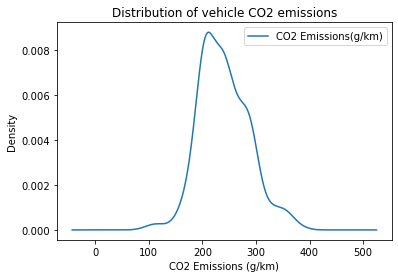

In [27]:
#Density plot of CO2 emissions (flat file)

Query6.plot.density(y = 'CO2 Emissions(g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Density')
plt.title('Distribution of vehicle CO2 emissions')
plt.show()
